In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib as plt

%matplotlib inline

In [2]:
%%script sqlite3 im.db --out tables
.tables
.quit

In [3]:
print(tables)

directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      



In [4]:
conn = sqlite3.Connection("im.db")

In [5]:
q0 ="""
SELECT *
FROM movie_ratings

"""
movie_ratings_df = pd.read_sql(q0, conn)
movie_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [6]:
q1 ="""
SELECT *
FROM movie_basics

"""
movie_basics_df = pd.read_sql(q1, conn)
movie_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [7]:
q2 ="""
SELECT *
FROM movie_ratings
JOIN movie_basics USING(movie_id)
ORDER BY numvotes DESC
"""
imdb_df = pd.read_sql(q2, conn)
imdb_df

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt1375666,8.8,1841066,Inception,Inception,2010,148.0,"Action,Adventure,Sci-Fi"
1,tt1345836,8.4,1387769,The Dark Knight Rises,The Dark Knight Rises,2012,164.0,"Action,Thriller"
2,tt0816692,8.6,1299334,Interstellar,Interstellar,2014,169.0,"Adventure,Drama,Sci-Fi"
3,tt1853728,8.4,1211405,Django Unchained,Django Unchained,2012,165.0,"Drama,Western"
4,tt0848228,8.1,1183655,The Avengers,The Avengers,2012,143.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...
73851,tt8420530,6.8,5,Tia and Piujuq,Tia and Piujuq,2018,80.0,Family
73852,tt8747790,4.6,5,A Monks Madness,A Monks Madness,2018,NaN,Action
73853,tt9367004,8.2,5,Up to the Last Drop: The Secret Water War in E...,Mehri tin teleftaia stagona: O mystikos polemo...,2017,58.0,Documentary
73854,tt9647642,2.0,5,The Confederate,The Confederate,2018,99.0,History


In [8]:
bom_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [9]:
tmdb_df = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [10]:
tn_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [11]:
rt_mov_info_df = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter='\t')
rt_mov_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [12]:
rt_rev_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter='\t', encoding='ISO-8859-1')
rt_rev_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [13]:
print(imdb_df.columns)
print(bom_df.columns)
print(tmdb_df.columns)
print(tn_df.columns)
print(rt_mov_info_df.columns)
print(rt_rev_df.columns)

Index(['movie_id', 'averagerating', 'numvotes', 'primary_title',
       'original_title', 'start_year', 'runtime_minutes', 'genres'],
      dtype='object')
Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')
Index(['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title',
       'popularity', 'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')
Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')
Index(['id', 'synopsis', 'rating', 'genre', 'director', 'writer',
       'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime',
       'studio'],
      dtype='object')
Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')


In [14]:
rt_data = pd.merge(rt_mov_info_df, rt_rev_df, on='id')
rt_data.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [15]:
rt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 0 to 54431
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54432 non-null  int64 
 1   synopsis      54300 non-null  object
 2   rating_x      54346 non-null  object
 3   genre         54345 non-null  object
 4   director      48992 non-null  object
 5   writer        45206 non-null  object
 6   theater_date  53206 non-null  object
 7   dvd_date      53206 non-null  object
 8   currency      33310 non-null  object
 9   box_office    33310 non-null  object
 10  runtime       53594 non-null  object
 11  studio        40125 non-null  object
 12  review        48869 non-null  object
 13  rating_y      40915 non-null  object
 14  fresh         54432 non-null  object
 15  critic        51710 non-null  object
 16  top_critic    54432 non-null  int64 
 17  publisher     54123 non-null  object
 18  date          54432 non-null  object
dtypes: i

In [16]:
rel_rt_data = rt_data[['id', 'genre', 'fresh']]
rel_rt_data.head()

,id,genre,fresh
0,3,Drama|Science Fiction and Fantasy,fresh
1,3,Drama|Science Fiction and Fantasy,rotten
2,3,Drama|Science Fiction and Fantasy,fresh
3,3,Drama|Science Fiction and Fantasy,fresh
4,3,Drama|Science Fiction and Fantasy,fresh


In [17]:
rel_rt_data = rel_rt_data.loc[rel_rt_data['fresh'] == 'fresh']

In [18]:
rel_rt_data = rel_rt_data[['genre', 'fresh', 'id']].groupby(['genre', 'fresh']).count()

In [19]:
rel_rt_data.sort_values(by=['id'], ascending=False)

,,id
genre,fresh,
Drama,fresh,4969
Comedy|Drama,fresh,2953
Comedy,fresh,1950
Drama|Mystery and Suspense,fresh,1780
Drama|Romance,fresh,1174
...,...,...
Action and Adventure|Art House and International|Drama|Kids and Family|Science Fiction and Fantasy,fresh,1
Comedy|Kids and Family|Television,fresh,1
Action and Adventure|Classics|Comedy|Musical and Performing Arts|Romance,fresh,1


array([[<AxesSubplot:title={'center':'Comedy'}>,
        <AxesSubplot:title={'center':'Comedy|Drama'}>],
       [<AxesSubplot:title={'center':'Drama'}>,
        <AxesSubplot:title={'center':'Drama|Mystery and Suspense'}>],
       [<AxesSubplot:title={'center':'Drama|Romance'}>, <AxesSubplot:>]],
      dtype=object)

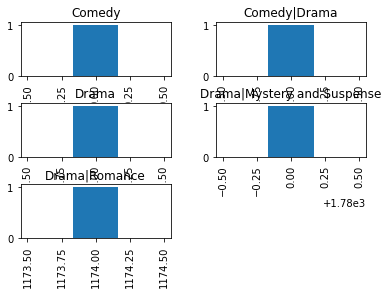

In [20]:
x = rel_rt_data.sort_values(by=['id'], ascending=False).head()
x.hist(column='id', by='genre', bins=3)

In [21]:
pd.pivot_table(rel_rt_data, index=['genre', 'fresh'], aggfunc='count')

,,id
genre,fresh,
Action and Adventure,fresh,1
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy,fresh,1
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts,fresh,1
Action and Adventure|Animation|Comedy,fresh,1
Action and Adventure|Animation|Comedy|Drama|Kids and Family,fresh,1
...,...,...
Mystery and Suspense|Science Fiction and Fantasy,fresh,1
Mystery and Suspense|Science Fiction and Fantasy|Western,fresh,1
Science Fiction and Fantasy,fresh,1


In [22]:
pd.pivot_table(rel_rt_data, index=['genre'])

,id
genre,
Action and Adventure,88
Action and Adventure|Animation|Art House and International|Drama|Science Fiction and Fantasy,4
Action and Adventure|Animation|Classics|Comedy|Kids and Family|Musical and Performing Arts,4
Action and Adventure|Animation|Comedy,121
Action and Adventure|Animation|Comedy|Drama|Kids and Family,148
...,...
Mystery and Suspense|Science Fiction and Fantasy,51
Mystery and Suspense|Science Fiction and Fantasy|Western,81
Science Fiction and Fantasy,5


In [23]:
rel_rt_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 245 entries, ('Action and Adventure', 'fresh') to ('Western', 'fresh')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      245 non-null    int64
dtypes: int64(1)
memory usage: 4.7+ KB


In [24]:
tmdb_df[['genre_ids', 'popularity', 'vote_average', 'vote_count']].groupby(['genre_ids']).agg(['count', 'mean', 'max'])

popularity                   vote_average  \
                                   count      mean     max        count   
genre_ids                                                                 
[10402, 10749, 18]                     2  2.252500   3.905            2   
[10402, 10749, 35, 18]                 3  5.984333   7.004            3   
[10402, 10749, 35]                     2  1.533000   1.666            2   
[10402, 10749]                         3  8.756000  18.586            3   
[10402, 10751, 14, 10770, 35]          1  6.454000   6.454            1   
...                                  ...       ...     ...          ...   
[99, 9648]                             4  2.993000   8.423            4   
[99, 99, 99]                           1  0.600000   0.600            1   
[99, 99]                               2  0.600000   0.600            2   
[99]                                3700  1.301358  13.442         3700   
[]                                  2479  0.759605   6.082         2479   

                                               vote_count                   
                                    mean   max      count        mean  max  
genre_ids                                                                   
[10402, 10749, 18]              7.950000  10.0          2   23.000000   45  
[10402, 10749, 35, 18]          6.500000   6.7          3   80.000000   88  
[10402, 10749, 35]              6.500000   6.9          2    5.500000    7  
[10402, 10749]                  5.466667   6.9          3   36.333333   69  
[10402, 10751, 14, 10770, 35]   5.400000   5.4          1   36.000000   36  
...                                  ...   ...        ...         ...  ...  
[99, 9648]                      5.700000   8.5          4  103.000000  402  
[99, 99, 99]                   10.000000  10.0          1    1.000000    1  
[99, 99]                        8.250000   9.0          2    1.500000    2  
[99]                            6.798351  10.0       3700   10.985676  713  
[]                              6.059863  10.0       2479    2.013715   55  

[2477 rows x 9 columns]

In [25]:
tmdb_df.describe()

,Unnamed: 0,id,popularity,vote_average,vote_count
count,26517.00000,26517.000000,26517.000000,26517.000000,26517.000000
mean,13258.00000,295050.153260,3.130912,5.991281,194.224837
std,7654.94288,153661.615648,4.355229,1.852946,960.961095
min,0.00000,27.000000,0.600000,0.000000,1.000000
25%,6629.00000,157851.000000,0.600000,5.000000,2.000000
50%,13258.00000,309581.000000,1.374000,6.000000,5.000000
75%,19887.00000,419542.000000,3.694000,7.000000,28.000000
max,26516.00000,608444.000000,80.773000,10.000000,22186.000000


In [26]:
tmdb_df = tmdb_df.loc[tmdb_df['vote_count'] > 10000]

In [27]:
tmdb_df.sort_values(by=['popularity', 'vote_average'], ascending=False)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
5179,5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673
11021,11021,"[28, 878, 12]",118340,en,Guardians of the Galaxy,49.606,2014-08-01,Guardians of the Galaxy,7.9,17958
20618,20618,"[28, 12, 878, 18]",315635,en,Spider-Man: Homecoming,46.775,2017-07-07,Spider-Man: Homecoming,7.4,11585
...,...,...,...,...,...,...,...,...,...,...
17443,17443,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028
20688,20688,"[35, 18, 10749]",313369,en,La La Land,16.275,2016-12-09,La La Land,7.9,10028
5235,5235,"[878, 12, 14]",70160,en,The Hunger Games,14.212,2012-03-23,The Hunger Games,7.1,14587
20729,20729,"[27, 53]",346364,en,It,13.966,2017-09-08,It,7.2,10931


In [28]:
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
test_str = '604,555.77'
ys = test_str.replace(',', '')
ys

'604555.77'

In [30]:
f_g = bom_df['foreign_gross'].values
#f = float(bom_df['foreign_gross'][0])
len(f_g)
y = []
c = ' '

#for x in bom_df['foreign_gross']:
#    print(type(x))

#for x in f_g:
#    print(type(x))


for x in f_g:
    if type(x) == float:
        y.append(x)
    elif type(x) == str:
        c = x.replace(',', '')
        y.append(float(c))

#y
#bom_df['foreign_gross']

#bom_df['foreign_gross'] = y
#bom_df.loc[['foreign_gross']] = y
bom_df.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [31]:
bom_df['world_wide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']
bom_df

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
numbers = [1, 2, 3, 4, 5]
top5_df1 = bom_df.head()
title_names = top5_df1['title']
i = 0
que = []
for x in title_names:
    bom_recs_imdb_df = imdb_df.loc[imdb_df['primary_title'] == x]
    print('The first row ',  numbers[i])
    print(bom_recs_imdb_df['genres'])
    que.append(bom_recs_imdb_df['genres'])
    i= i+1
que[0].iloc[0]

In [ ]:
print(imdb_df.loc[imdb_df['primary_title'] == 'The Avengers']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'Avengers: Age of Ultron']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'Black Panther']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'Harry Potter and the Deathly Hallows: Part 2']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'Star Wars: The Last Jedi']['genres'].iloc[0])

In [ ]:
imdb_df['primary_title'].sort_values()[56050:56100]

In [ ]:
tn_df

In [ ]:
tn_df['worldwide_gross'][0]

In [ ]:
p_b = tn_df['production_budget'].values
w_g = tn_df['worldwide_gross'].values
#f = float(bom_df['foreign_gross'][0])
#len(f_g)
y = []
z = []
c = ' '
d = ' '

for x in p_b:
    if type(x) == float:
        y.append(int(x))
    elif type(x) == int:
        y.append(x)
    elif type(x) == str:
        c = x.replace(',', '')
        y.append(c)

p_b = y
y = []
c = ' '

for x in p_b:
    if type(x) == float:
        y.append(int(x))
    elif type(x) == int:
        y.append(x)
    elif type(x) == str:
        c = x.replace('$', '')
        y.append(int(c))

y
#bom_df['foreign_gross']
tn_df.loc[tn_df['production_budget']] = y
#bom_df['foreign_gross'] = y
#bom_df.loc[['foreign_gross']] = y
#bom_df.head()
tn_df.head()

In [ ]:
#print(imdb_df.loc[imdb_df['primary_title'] == 'Mad Max']['genres'].iloc[0])
#print(imdb_df.loc[imdb_df['primary_title'] == 'Paranormal Activity']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'The Gallows']['genres'].iloc[0])
print(imdb_df.loc[imdb_df['primary_title'] == 'Blair Witch']['genres'].iloc[0])
#print(imdb_df.loc[imdb_df['primary_title'] == 'Super Size Me']['genres'].iloc[0])

In [ ]:
imdb_df.numvotes.dtype

In [33]:
tmdb_genres = [
    'Adventure', 'Action', 'Fantasy',
    'Action', 'Thriller',
    'Action', 'Adventure', 'Animation', 'Sci-Fi', 'Comedy',
    'Action', 'Adventure', 'Fantasy',
    'Sci-Fi', 'Action', 'Adventure'
]

imdb_genres = [
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Thriller',
    'Adventure', 'Drama', 'Sci-Fi', 
    'Drama', 'Western',
    'Action', 'Adventure', 'Sci-Fi'
]

rt_genres = [
    'Drama',
    'Comedy', 'Drama',
    'Comedy',  
    'Drama', 'Mystery', 'Suspense',
    'Drama', 'Romance'
]

bom_genres = [
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Adventure', 'Sci-Fi',
    'Action', 'Adventure', 'Sci-Fi',  
    'Adventure', 'Drama', 'Fantasy',
    'Action', 'Adventure', 'Fantasy'
]

tn_genres = [
    'Action', 'Adventure', 'Sci-Fi', 'Thriller',
    'Horror', 'Mystery',
    'Horror', 'Mystery', 'Thriller',
    'Horror', 'Mystery', 'Thriller',
    'Documentary'
]


In [36]:
pop_dict = {}

pop_list = tmdb_genres + imdb_genres + rt_genres
for pop in pop_list:
    pop_dict.update({pop:0})
    
pop_dict

{'Adventure': 0,
 'Action': 0,
 'Fantasy': 0,
 'Thriller': 0,
 'Animation': 0,
 'Sci-Fi': 0,
 'Comedy': 0,
 'Drama': 0,
 'Western': 0,
 'Mystery': 0,
 'Suspense': 0,
 'Romance': 0}

In [37]:
for pl in pop_list:
    pop_dict[pl] += 1
    
pop_dict

{'Adventure': 7,
 'Action': 8,
 'Fantasy': 2,
 'Thriller': 2,
 'Animation': 1,
 'Sci-Fi': 5,
 'Comedy': 3,
 'Drama': 6,
 'Western': 1,
 'Mystery': 1,
 'Suspense': 1,
 'Romance': 1}